In [107]:
### creat enviornment
import datetime as dt
import pandas_datareader as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [108]:
### Download Data from Yahoo Finance API and save it as csv file
start = dt.datetime(2000,1,1)
end = dt.datetime(2021,12,31)
tsla = web.DataReader('TSLA','yahoo', start=start, end=end)
tsla.to_csv(r'C:/data/Tasla_Prices.csv')
tsla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222


In [109]:
### import Data
tsla = pd.read_csv('C:/data/Tasla_Prices.csv')
tsla.tail()


,Date,High,Low,Open,Close,Volume,Adj Close
2894,2021-12-27,1117.000000,1070.719971,1073.670044,1093.939941,23715300.0,1093.939941
2895,2021-12-28,1119.000000,1078.420044,1109.489990,1088.469971,20108000.0,1088.469971
2896,2021-12-29,1104.000000,1064.140015,1098.640015,1086.189941,18718000.0,1086.189941
2897,2021-12-30,1095.550049,1053.150024,1061.329956,1070.339966,15680300.0,1070.339966
2898,2021-12-31,1082.000000,1054.589966,1073.439941,1056.780029,13528700.0,1056.780029


In [110]:
### Summary Stats
tsla.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2899.000000,2899.000000,2899.000000,2899.000000,2.899000e+03,2899.000000
mean,125.882152,120.492565,123.262719,123.360381,3.139069e+07,123.360381
std,231.207664,220.999259,226.272890,226.491649,2.823235e+07,226.491649
min,3.326000,2.996000,3.228000,3.160000,5.925000e+05,3.160000
25%,18.094999,16.420000,17.118000,17.483000,1.284450e+07,17.483000
50%,46.956001,45.422001,46.144001,46.122002,2.482750e+07,46.122002
75%,67.971001,65.465000,66.691002,66.784000,3.999685e+07,66.784000
max,1243.489990,1217.000000,1234.410034,1229.910034,3.046940e+08,1229.910034


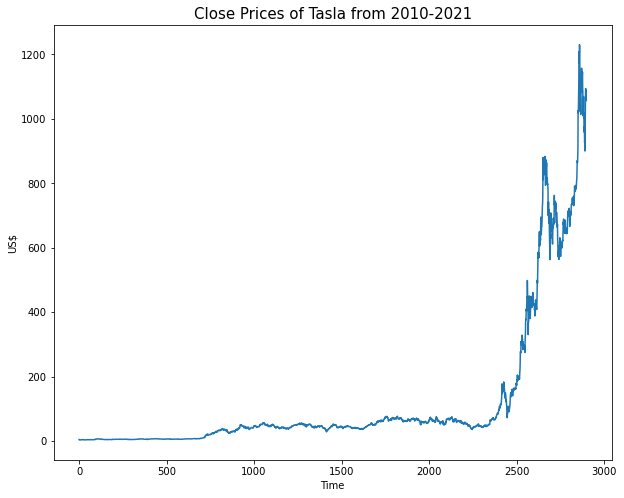

In [111]:
### Plotting Closing Prices
plt.figure(figsize=(10, 8))
plt.title("Close Prices of Tasla from 2010-2021", size=15)
plt.xlabel("Time")
plt.ylabel("US$")
plt.plot(tsla.loc[:,'Close'])

In [112]:
### Generate Price difference and Directions for Stock Prices
tsla['PriceDiff'] = tsla['Adj Close'].shift(-1) - tsla['Adj Close']
tsla['Direction'] = [1 if tsla['PriceDiff'].loc[ei] > 0 else 0 for ei in tsla.index ]
print(tsla['Direction'])

0       0
1       0
2       0
3       0
4       0
       ..
2894    0
2895    0
2896    0
2897    0
2898    0
Name: Direction, Length: 2899, dtype: int64


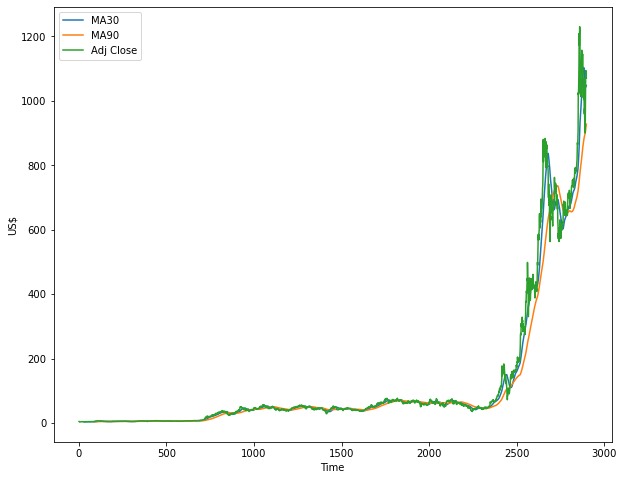

In [113]:
### Creat a new column in DataFrame using Rolling to calculate Moving Average
tsla['MA30'] = tsla['Adj Close'].rolling(30).mean()
tsla['MA90'] = tsla['Adj Close'].rolling(90).mean()
plt.figure(figsize=(10, 8))
tsla['MA30'].iloc[1:2898].plot(label='MA30') #Fast Signal
tsla['MA90'].iloc[1:2898].plot(label='MA90') #Slow Signal
tsla['Adj Close'].iloc[1:2898].plot(label='Adj Close') 
plt.xlabel("Time")
plt.ylabel("US$")
plt.legend()
plt.show()

In [114]:
###Simple Strategy:Long stock if Fast Signal > Slow Signal

#Add a new column "Shares", if fast>slow, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)
tsla['Shares'] = [1 if tsla.loc[ei, 'MA30']>tsla.loc[ei, 'MA90'] else 0 for ei in tsla.index]

#Add a new column "Profit" using List Comprehension, for any rows in data, if Shares=1, the profit is calculated as the close price of 
#tomorrow - the close price of today. Otherwise the profit is 0.
tsla['Close1'] = tsla['Adj Close'].shift(-1)
tsla['Profit'] = [tsla.loc[ei, 'Close1'] - tsla.loc[ei, 'Adj Close'] if tsla.loc[ei, 'Shares']==1 else 0 for ei in tsla.index]



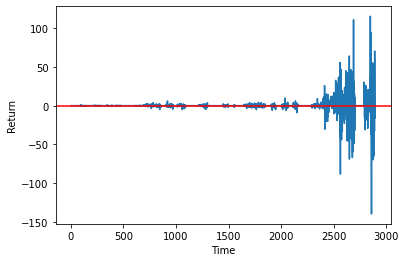

In [119]:
#Plot a graph to show the Profit/Loss
tsla['Profit'].plot()
plt.xlabel("Time")
plt.ylabel("Return")
plt.axhline(y=0, color='red')

In [116]:
#Use .cumsum() to calculate the accumulated wealth over the period
tsla['Cumulative Earnings'] = tsla['Profit'].cumsum()
tsla.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,PriceDiff,Direction,MA30,MA90,Shares,Close1,Profit,Cumulative Earnings
2894,2021-12-27,1117.000000,1070.719971,1073.670044,1093.939941,23715300.0,1093.939941,-5.469971,0,1042.778668,914.282998,1,1088.469971,-5.469971,1003.893938
2895,2021-12-28,1119.000000,1078.420044,1109.489990,1088.469971,20108000.0,1088.469971,-2.280029,0,1044.613666,918.894109,1,1086.189941,-2.280029,1001.613908
2896,2021-12-29,1104.000000,1064.140015,1098.640015,1086.189941,18718000.0,1086.189941,-15.849976,0,1047.040330,923.404441,1,1070.339966,-15.849976,985.763933
2897,2021-12-30,1095.550049,1053.150024,1061.329956,1070.339966,15680300.0,1070.339966,-13.559937,0,1047.560663,927.449330,1,1056.780029,-13.559937,972.203996
2898,2021-12-31,1082.000000,1054.589966,1073.439941,1056.780029,13528700.0,1056.780029,NaN,0,1046.486330,931.319219,1,NaN,NaN,NaN


Text(0.5, 1.0, 'Total money you win is 972.203996181488')

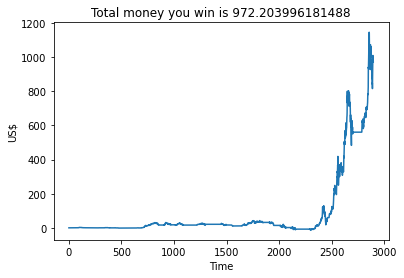

In [117]:
#plot the wealth to show the growth of profit over the period
tsla['Cumulative Earnings'].plot()
plt.xlabel("Time")
plt.ylabel("US$")
plt.title('Total money you win is {}'.format(tsla.loc[tsla.index[-2], 'Cumulative Earnings']))

In [118]:
tsla.to_csv(r'C:/data/Tasla_Strategy.csv')